# A. Import data

NAMA = kevin Caesar

NIM = 162012133057

PRAKTIKUM 8 : KLASIFIKASI TEXT

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk
!pip install tensorflow
!pip install keras
!pip install demoji
!pip install Sastrawi
import nltk #import nltk
nltk.download('wordnet') #download nltk wordnet
nltk.download('punkt') #download nltk punkt
nltk.download('stopwords') #download nltk stopwords
nltk.download('omw-1.4') #download omw-1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#cleaning
import re
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import demoji

#stemmer
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer

#wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#frekuensi kata
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
#visualisasi data
import numpy as np
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
#melakukan klasifikasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix,precision_recall_curve, auc, roc_curve, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import tensorflow as tf
import keras
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, cross_val_predict

In [ ]:
data = pd.read_csv('/content/sample_data/all_agree.csv')
data.head()

,title,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,MPR: Amandemen UUD 1945 Tak Akan Melebar ke Ma...,non-clickbait,0


In [ ]:
print(data.shape)
data.isnull().sum()

(8613, 3)


title          0
label          0
label_score    0
dtype: int64

dari data diatas terdapat jumlah data sebanyak 8613 yang memuat tiga informasi yaitu title, label, dan label score. kemudian, di cek tidak terdapat missing value

In [ ]:
data['label'].value_counts()

non-clickbait    5297
clickbait        3316
Name: label, dtype: int64

dari hasil yang ditampilkan bahwa terdapat berita non-clicbalt sebanyak  5297 dan clickbalt sebanyak 3316

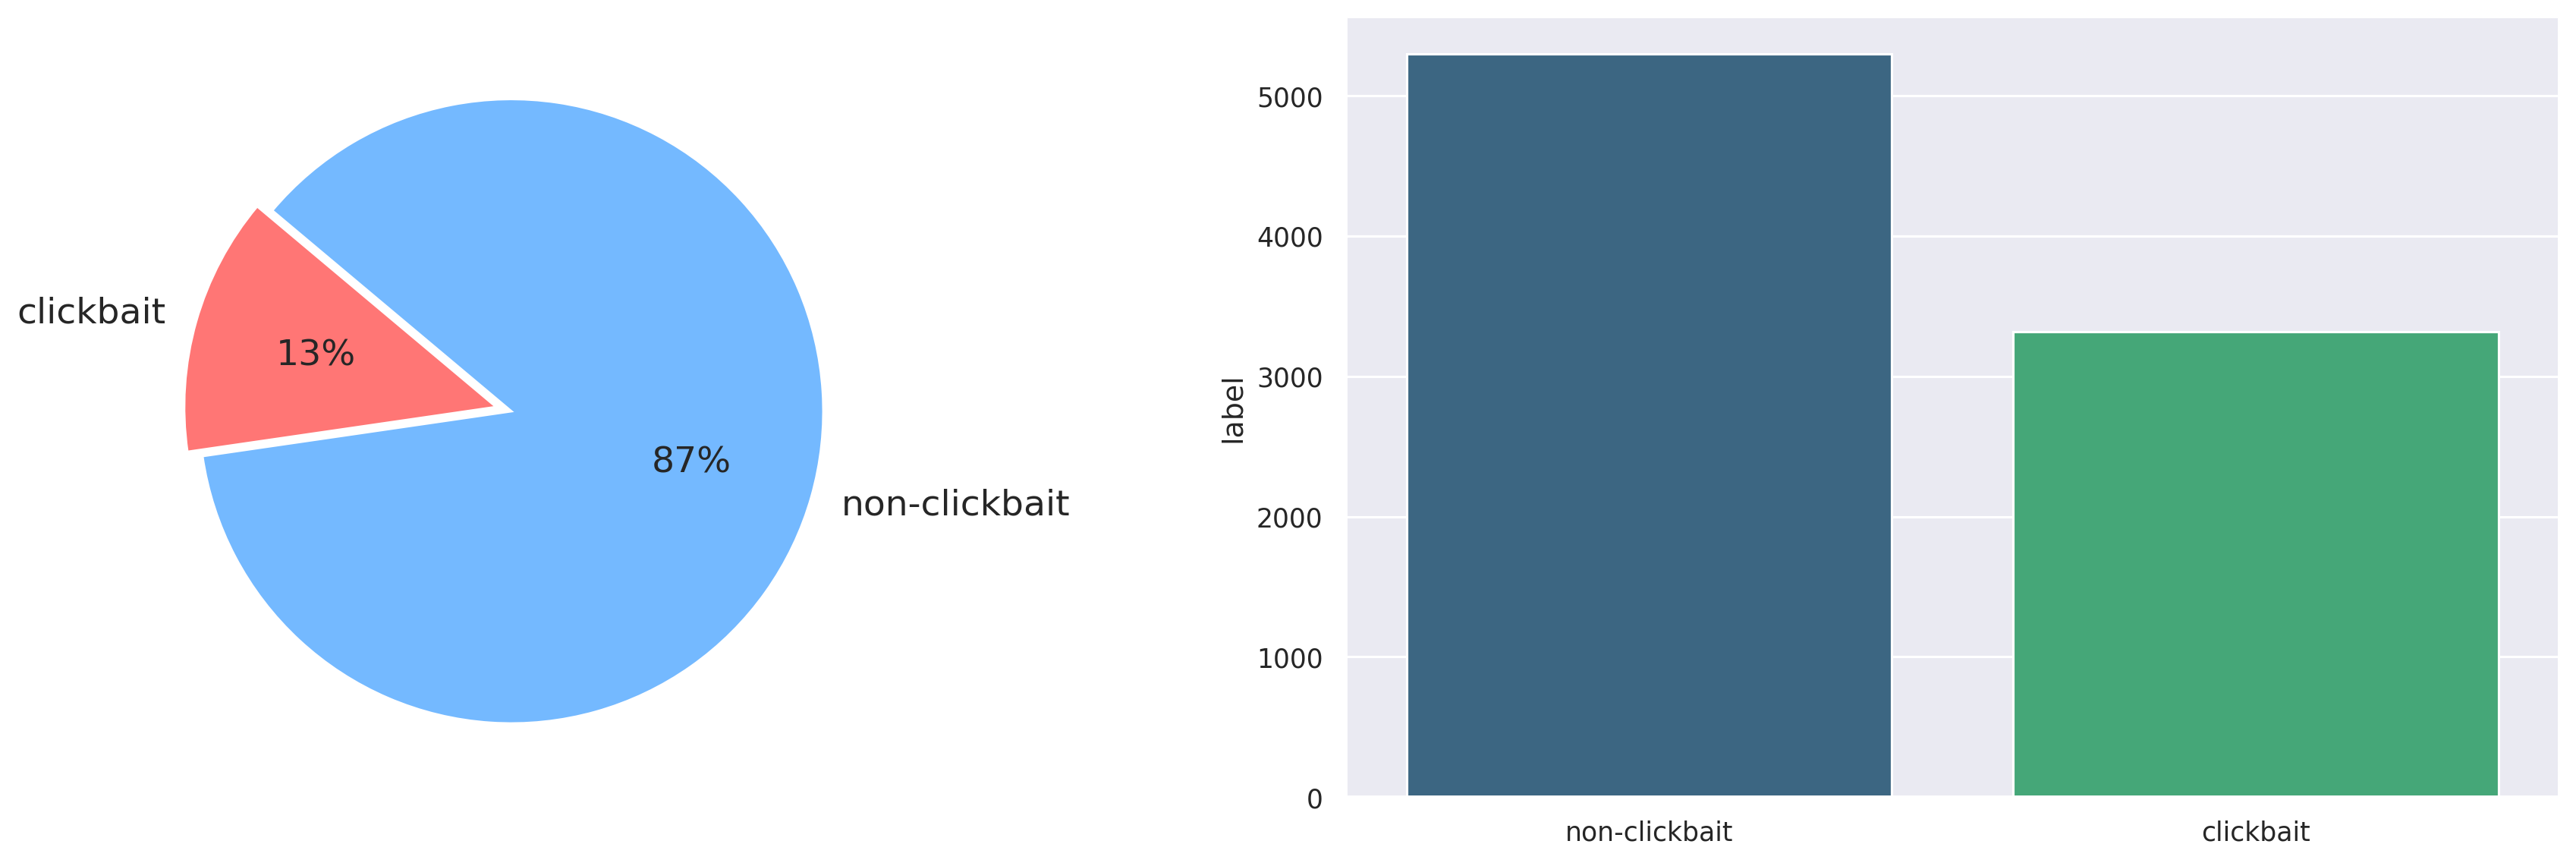

In [ ]:
labels = ['clickbait', 'non-clickbait']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data['label'].unique(), y = data['label'].value_counts(), palette= 'viridis')

plt.show()

dari visualisasi diatas dapat disimpulkan bahwa terdapat 87% berita kategori non-clickbait (>5000 data) dan 13% berita kategori clickbait (<3200 data)

# B. Text Processing

## B.1 cleaning

In [ ]:
stop_words = set(stopwords.words('indonesian')+stopwords.words('english'))
def preprocess_text(title):
 text = str(title) # Convert Object to str
 text = re.sub(r"@[A-Za-z0-9_]+","",text) # Remove mention
 text = re.sub(r"#[A-Za-z0-9]+","",text) # Remove hastag
 text = text.lower() # Lowercase text
 text = re.sub(f"[{re.escape(punctuation)}]", "", text) # Remove punctuation
 text = demoji.replace(text, "") # Remove emoji
 text = re.sub(r"\d+", "", text) # Remove number
 text = " ".join(text.split()) # Remove extra spaces, tabs, and new lines
 word_token = word_tokenize(text) # Tokenize text after cleaning
 clean_tokens = [w for w in word_token if not w in stop_words] # Remove text after cleaning in list stopwords

 return clean_tokens # return text after cleaning and remove stopwords
data['cleaning_title'] = data['title'].apply(preprocess_text) # process preprocessing text with function
data['cleaning_title'] = data['cleaning_title'].apply(' '.join) # join word in list
hasil = " ".join(data['cleaning_title']) # join list in one text

Kemudian, kita melakukan bagian nltk yang bermaksud agar mengubah type data object  menjadi string, menyeragamkan menjadi huruf kecil, menghilangkan tanda baca,  menghilangkan angka, menghilangkan space, dan menjadikan satu paragraf. Maka didapat  hasil seperti berikut

## B.2 stemming

In [ ]:
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
out = stemmer.stem(hasil)

In [ ]:
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["fixtitle"] = data["cleaning_title"].apply(lambda text: stem_words(text))
data.head()

,title,label,label_score,cleaning_title,fixtitle
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,masuk radar pilwalkot medan menantu jokowi ber...,masuk radar pilwalkot medan menantu jokowi tem...
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,malaysia sudutkan ri isu kabut asap invasi babi,malaysia sudut ri isu kabut asap invasi babi
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,viral driver ojol bekasi pesanan makanan pakai...,viral driver ojol bekas pesan makan pakai sepeda
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0,kemensos salurkan rp korban kerusuhan sosial p...,kemensos salur rp korban rusuh sosial papua
4,MPR: Amandemen UUD 1945 Tak Akan Melebar ke Ma...,non-clickbait,0,mpr amandemen uud melebar manamana,mpr amandemen uud lebar manamana


In [ ]:
out

'masuk radar pilwalkot medan menantu jokowi temu dpw nasdem sumut malaysia sudut ri isu kabut asap invasi babi viral driver ojol bekas pesan makan pakai sepeda kemensos salur rp korban rusuh sosial papua mpr amandemen uud lebar manamana ingat islam banyuwangi gelar festival muharam wanita kendari perkosa jalan makassar laku buru hnw gbhn jamin rencana bangun ri jangka motor nyangkut bambu sleman jakpro protes adhi karya tender proyek jis wika pesan gamblang poyuono tolak revisi uu kpk lokasi istana presiden ri papua menit jembatan holtekamp hias taman asia afrika bandung rusak terjang angin kencang polemik pb djarum kpai fadli zon mesti musyawarah acara aju tangguh tahan kivlan zen eksepsi bassist boomerang hubert henry ganja tolak hakim jenguk bj habibie rspad kepala bppt beliau semangat recovery jk jenguk habibie rspad gatot soebroto mobil timpa pohon pondok indah kemudi luka demokrat bangun museum art gallery sbyani pacitan mendagri jamin laksana uu otsus papua lanjut tegas dukung p

Pada langkah ini dengan menggunakan package sastrawi kita akan mengubah tiap kata  menjadi kata dasar contoh seperti di teks batalkan menjadi batal , ditangkap menjadi tangkap,  dan sebagainya. Maka hasil yang akan muncul seperti diatas

In [ ]:
#TF-IDF
#initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df = 5, max_df = 0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vector in X
X_stem = vectorizer.fit_transform(data['fixtitle'])

## B.3 visualisasi

### B.3.1 click-bait dan non-clickbait

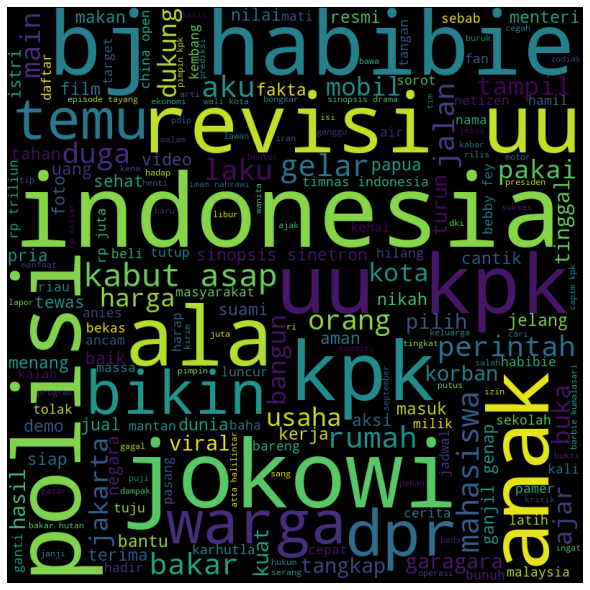

In [ ]:
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Pada visualiasi menggunakan NLTK untuk mengetahui kata pada judul berita yang  muncul. Maka visualisasi dibawah didapat tiga kata yang sering dibahas/muncul yaitu (1)indonesia,  (2)kpk , dan (3) polisi.

### B.3.2 clickbait

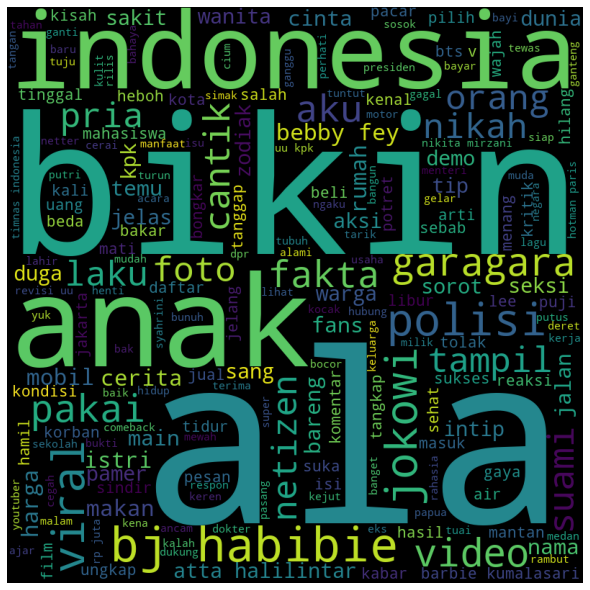

In [ ]:
text1 = " ".join(data[data['label'] == 'clickbait']['fixtitle'])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text1)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

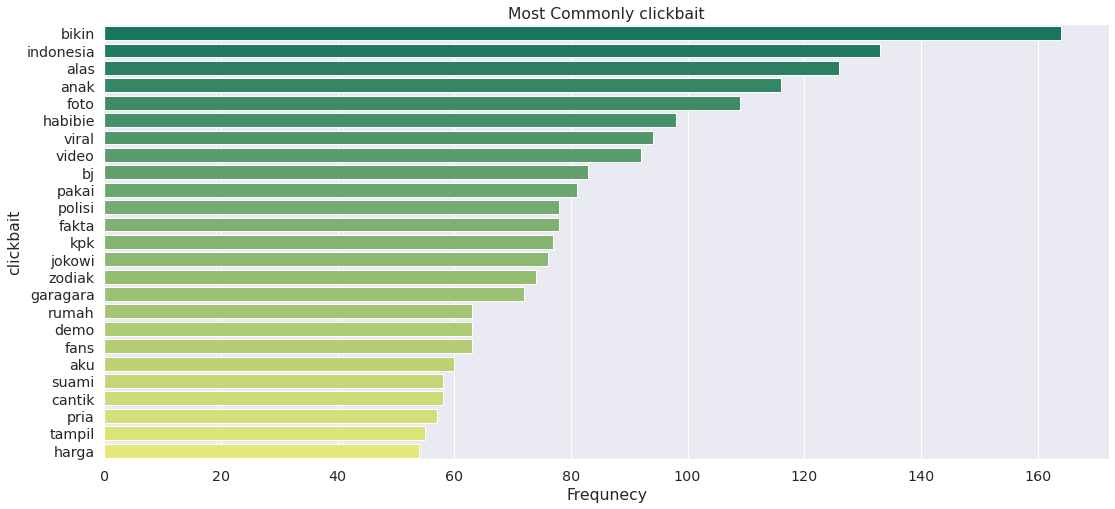

In [ ]:
all_clickbait_words1 = []
for sentence in data[data['label_score'] == 1]['fixtitle'].to_list():
    for word in sentence.split():
        all_clickbait_words1.append(word)

df = pd.DataFrame(Counter(all_clickbait_words1).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly clickbait")
plt.xlabel("Frequnecy")
plt.ylabel("clickbait")
plt.show()

Pada visualiasi menggunakan freqdist dari NLTK untuk mengetahui jumlah frekuensi judul berita clickbait yang muncul. Maka visualisasi dibawah didapat tiga kata yang sering dibahas/muncul yaitu (1) bikin ,  (2)indonesia, dan (3) alas.

### B.3.3 non-clickbit

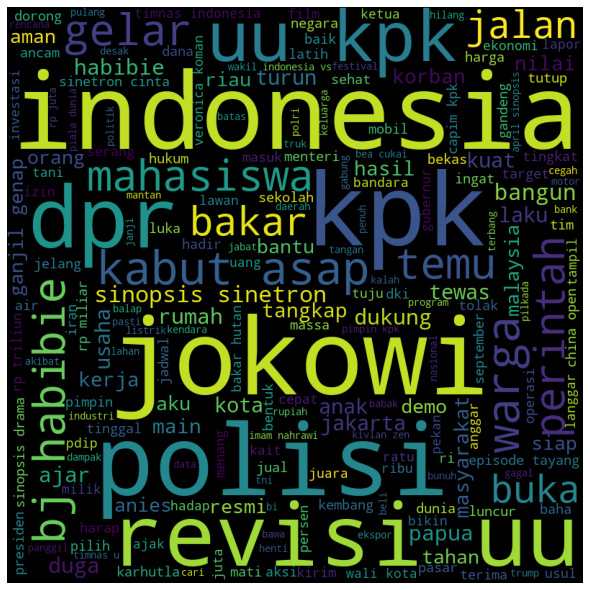

In [ ]:
text1 = " ".join(data[data['label'] == 'non-clickbait']['fixtitle'])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text1)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

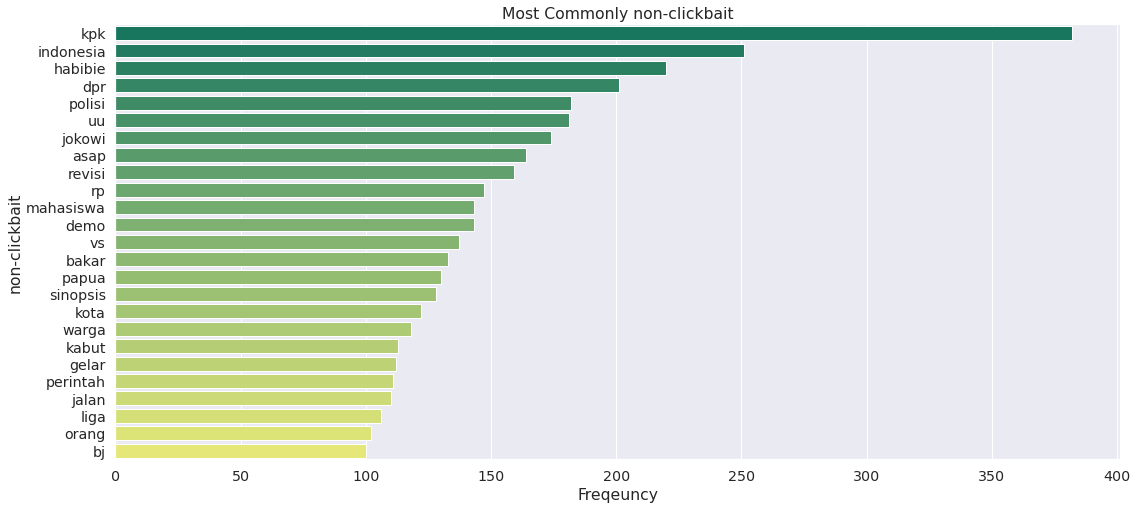

In [ ]:
all_nonclickbait_words = []
for sentence in data[data['label_score'] == 0]['fixtitle'].to_list():
    for word in sentence.split():
        all_nonclickbait_words.append(word)

df = pd.DataFrame(Counter(all_nonclickbait_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly non-clickbait")
plt.xlabel("Freqeuncy")
plt.ylabel("non-clickbait")
plt.show()

Pada visualiasi menggunakan freqdist dari NLTK untuk mengetahui jumlah frekuensi kata judul berita non-clickbait yang
muncul. Maka visualisasi dibawah didapat tiga kata yang sering dibahas/muncul yaitu (1)kpk, (2)indonesia, dan (3) habibie.

# C. modeling

## C.1 Train dan test split

In [ ]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

In [ ]:
#We separate our data is train and test
y = data['label_score'] # clickbait or none clickbait
X_train_stem, X_test_stem, Y_train_stem, Y_test_stem = train_test_split(
    X_stem,y, test_size = 0.2, random_state = 0, stratify = y)

## C.2 KLASIFIKASI

### C.2.1 Random Forest

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_stem, Y_train_stem)
Y_pred_stem = clf.predict(X_test_stem)
Y_pred_tr_stem = clf.predict(X_train_stem)
# confusion matrix
cnf_matrix = confusion_matrix(Y_test_stem, Y_pred_stem)
print(cnf_matrix)
print(classification_report(Y_test_stem, Y_pred_stem))

[[928 132]
 [216 447]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1060
           1       0.77      0.67      0.72       663

    accuracy                           0.80      1723
   macro avg       0.79      0.77      0.78      1723
weighted avg       0.80      0.80      0.80      1723



interpretasi:

Menggunakan random forest dengan proses stemming:

>1. 928 Judul non-clickbait telah diklasifikasikan dengan benar
> 2. 447 Judul clickbait telah diklasifikasikan dengan benar
> 3. 132 Judul non-clickbait telah diklasifikasikan sebagai judul berita clickbait (False Positif)
> 4. 216 Judul clickbait diklasifikasikan sebagai judul berita non-clickbait (False Negatif)

In [ ]:
#Train
accuracy_tr = accuracy_score(Y_train_stem, Y_pred_tr_stem)
#Test
accuracy = accuracy_score(Y_test_stem, Y_pred_stem)
#Save Evaluation
stem_model_eval_tts_train.loc['Random Forest'] = [accuracy_tr]
stem_model_eval_tts_test.loc['Random Forest'] = [accuracy]

### C.2.2 Naive baiyes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_stem, Y_train_stem)
Y_pred_stem = nb.predict(X_test_stem)
Y_pred_tr_stem = nb.predict(X_train_stem)
# confusion matrix
cnf_matrix = confusion_matrix(Y_test_stem, Y_pred_stem)
print(cnf_matrix)
print(classification_report(Y_test_stem, Y_pred_stem))

[[983  77]
 [243 420]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1060
           1       0.85      0.63      0.72       663

    accuracy                           0.81      1723
   macro avg       0.82      0.78      0.79      1723
weighted avg       0.82      0.81      0.81      1723



In [ ]:
#Train
accuracy_tr = accuracy_score(Y_train_stem, Y_pred_tr_stem)
#Test
accuracy = accuracy_score(Y_test_stem, Y_pred_stem)
#Save Evaluation
stem_model_eval_tts_train.loc['Naive Baiyes'] = [accuracy_tr]
stem_model_eval_tts_test.loc['Naive Baiyes'] = [accuracy]

interpretasi:

Menggunakan naive bayes dengan proses stemming:

>1. 983 Judul non-clickbait telah diklasifikasikan dengan benar
> 2. 420 Judul clickbait telah diklasifikasikan dengan benar
> 3. 77 Judul non-clickbait telah diklasifikasikan sebagai judul berita clickbait (False Positif)
> 4. 243 Judul clickbait diklasifikasikan sebagai judul berita non-clickbait (False Negatif)

### C.2.3 SVM

In [ ]:
svm = SVC()
svm.fit(X_train_stem, Y_train_stem)
Y_pred_stem = svm.predict(X_test_stem)
Y_pred_tr_stem = svm.predict(X_train_stem)
# confusion matrix
cnf_matrix = confusion_matrix(Y_test_stem, Y_pred_stem)
print(cnf_matrix)
print(classification_report(Y_test_stem, Y_pred_stem))

[[997  63]
 [251 412]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1060
           1       0.87      0.62      0.72       663

    accuracy                           0.82      1723
   macro avg       0.83      0.78      0.79      1723
weighted avg       0.83      0.82      0.81      1723



interpretasi:

Menggunakan support vector machine dengan proses stemming:

>1. 997 Judul non-clickbait telah diklasifikasikan dengan benar
> 2. 412 Judul clickbait telah diklasifikasikan dengan benar
> 3. 63 Judul non-clickbait telah diklasifikasikan sebagai judul berita clickbait (False Positif)
> 4. 251 Judul clickbait diklasifikasikan sebagai judul berita non-clickbait (False Negatif)

In [ ]:
#Train
accuracy_tr = accuracy_score(Y_train_stem, Y_pred_tr_stem)
#Test
accuracy = accuracy_score(Y_test_stem, Y_pred_stem)
#Save Evaluation
stem_model_eval_tts_train.loc['Support Vector Machine'] = [accuracy_tr]
stem_model_eval_tts_test.loc['Support Vector Machine'] = [accuracy]

## C.3 CROSS VALIDATIOM

In [ ]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_cv = pd.DataFrame(columns=['Accuracy'])

### C.3.1 Random Forest

In [ ]:
model = RandomForestClassifier()
def return_score(model,X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  return score

scores = []

#StratifiedK-Fold (Stratified5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=False)
for train_index, test_index in cv.split(X_stem,y):
  X_train, X_test, y_train, y_test = train_test_split(X_stem,y,
                                                      test_size=0.2,random_state = 42)
  score = return_score(model,X_train, X_test, y_train, y_test)
  scores.append(score)

accuracy = np.mean(scores)
print("Accuracy score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))
stem_model_eval_cv.loc['Random Forest'] = [accuracy]

Accuracy score in each iteration: [0.8026697620429484, 0.8090539756239118, 0.8061520603598374, 0.8026697620429484, 0.8096343586767266]
K-Fold Score: 0.8060359837492745


Dengan menggunakan Cross Validation, random forest 5 Fold tidak ditemukan overfitting karena akurasi di tiap iterasi nilainya mendekati. Didapatkan rata-rata akurasi model Random Forest sebesar 80,6%

### C.3.2 Naive Baiyes

In [ ]:
model2 = MultinomialNB()
scores = []
#StratifiedK-Fold (Stratified5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=False)
for train_index, test_index in cv.split(X_stem,y):
  X_train, X_test, y_train, y_test = train_test_split(X_stem,y,test_size=0.2)
  score = return_score(model2,X_train, X_test, y_train, y_test)
  scores.append(score)

accuracy = np.mean(scores)
print("Accuracy score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))
stem_model_eval_cv.loc['Naive Baiyes'] = [accuracy]

Accuracy score in each iteration: [0.8212420197330238, 0.8154381892048752, 0.8264654672083576, 0.8183401044689496, 0.7986070806732444]
K-Fold Score: 0.8160185722576901


Dengan menggunakan Cross Validation, naive bayes 5 Fold tidak ditemukan overfitting karena akurasi di tiap iterasi nilainya mendekati. Didapatkan rata-rata akurasi model naive baiyes sebesar 81,6%

### C.3.3 SVM

In [ ]:
model3 = SVC()
scores = []
#StratifiedK-Fold (Stratified5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=False)
for train_index, test_index in cv.split(X_stem,y):
  X_train, X_test, y_train, y_test = train_test_split(X_stem,y,test_size=0.2)
  score = return_score(model3,X_train, X_test, y_train, y_test)
  scores.append(score)

accuracy = np.mean(scores)
print("Accuracy score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))
stem_model_eval_cv.loc['Support Vector Machine'] = [accuracy]

Accuracy score in each iteration: [0.840975043528729, 0.8055716773070226, 0.8340104468949506, 0.83633197910621, 0.824143934997098]
K-Fold Score: 0.828206616366802


Dengan menggunakan Cross Validation, support vector machine 5 Fold tidak ditemukan overfitting karena akurasi di tiap iterasi nilainya mendekati. Didapatkan rata-rata akurasi model support vector machine sebesar 82,82%

# D. evaluation

## D.1 Train dan test split

In [ ]:
stem_model_eval_tts_train

,Accuracy
Random Forest,0.999129
Naive Baiyes,0.860522
Support Vector Machine,0.959361


In [ ]:
stem_model_eval_tts_test

,Accuracy
Random Forest,0.798027
Naive Baiyes,0.814277
Support Vector Machine,0.817760


interpretasi:

Dari hasil evaluasi berupa akurasi untuk Random Forest dan support vector machine Terjadi Overfitting karena selisih yang signifikan dari akurasi data train dan data tes sementara untuk Naive Bayes tidak terjadi overfitting karena selisih tidak signifikan dari akurasi data train dan data tes
. Skor akurasi tertinggi diperoleh oleh support vector machine dengan skor akurasi 81,17%

## D.2 Cross Validation

In [ ]:
stem_model_eval_cv

,Accuracy
Random Forest,0.806036
Naive Baiyes,0.816019
Support Vector Machine,0.828207


Interpretasi :

Skor akurasi tertinggi diperoleh oleh algortima Support Vector Machine dengan skor akurasi
82,82% dan semua model tidak diindentifikasi overfitting.

Dengan menggunakan stemming  hasil evaluasi yang diperoleh tidak berbeda jauh malah hampir sama dan model terbaik dari ketiga model yang diujikan yaitu  Support Vector Machine karena memiliki akurasi yang tertinggi namun terindentifikasi overffiting di antara ketiga algoritma tersebut sehingga langkah yang dilakukan selanjutnya untuk memprediksi yaitu text preprocessing melakukan cross validation agar mengatasi overfitting model yang digunakan adalah
support vector machine ataupun model lain yang memiliki akurasi yang baik dan tidak terjadi
overfitting

